<a href="https://colab.research.google.com/github/MoroF10/curso/blob/main/An%C3%A1lise_chrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agora estou iniciando uma análise dos dados bancários, com a perspectiva de encontrar o motivo da evasão dos clientes e propor melhorias para que isso aconteca com uma frequência menor.


Tambem tem cono objetivo criar um modelo preditivo para prever possiveis clientes que deixarão de ser clientes do banco.

In [1]:
#importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Base de dados para análise
df = pd.read_csv("Churn.csv")

In [3]:
#Visualização dos dados
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Informações gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Descrição dos dados numéricos
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Busca por dados nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Busca por dados duplicados
df.duplicated().any()

False

Após esse primeira análise, os dados estão prontos para serem usados, pois não existe dados duplicados ou nulos no dataset.

Objetivos a ser alcancados nesse projeto:

1- Identificar a taxa de evasão de clientes.

2- Tentar entender os principais motivos para essa evasão.

3- Criar um modelo preditivo para evitar a evasão dos clientes.

1- Identificar a taxa de evasão de clientes.

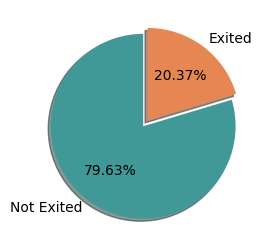

In [5]:
#Valores para o plot
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']
cores = [ '#409996','#E68753']

#plotando os dados
plt.subplots(figsize = (4, 3))
explode = (0.01, 0.07)

plt.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,colors=cores,
                                   startangle = 90, explode = explode)
plt.show()

Pouco mais de 20%dos clientes deixaram de ser clientes do banco.

Agora é importante visualizar os dados para entender melhor a situação e tentar identificar os possíveis motivos que tem levado aos clientes deixar o banco.

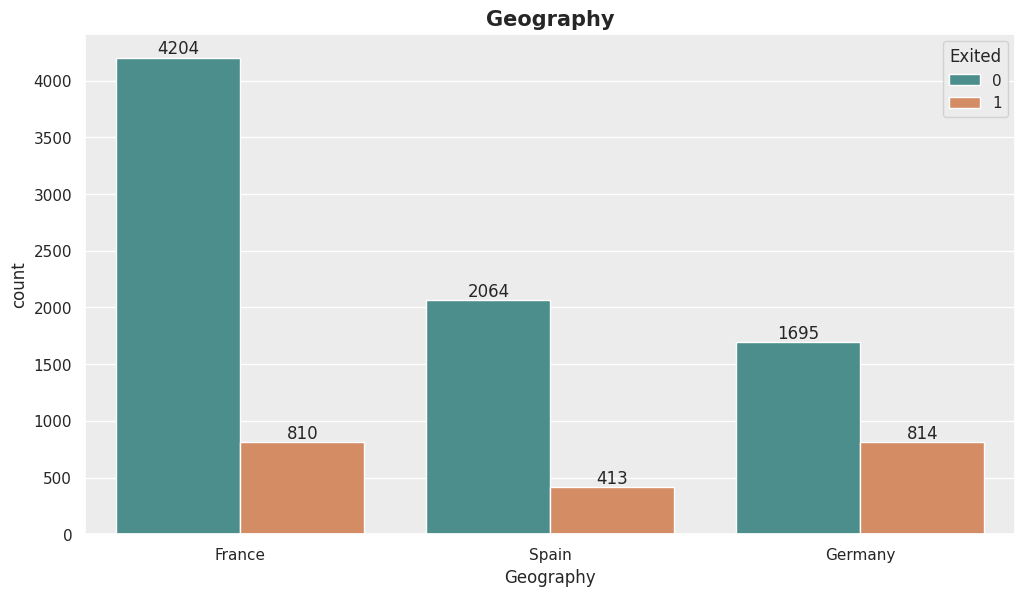

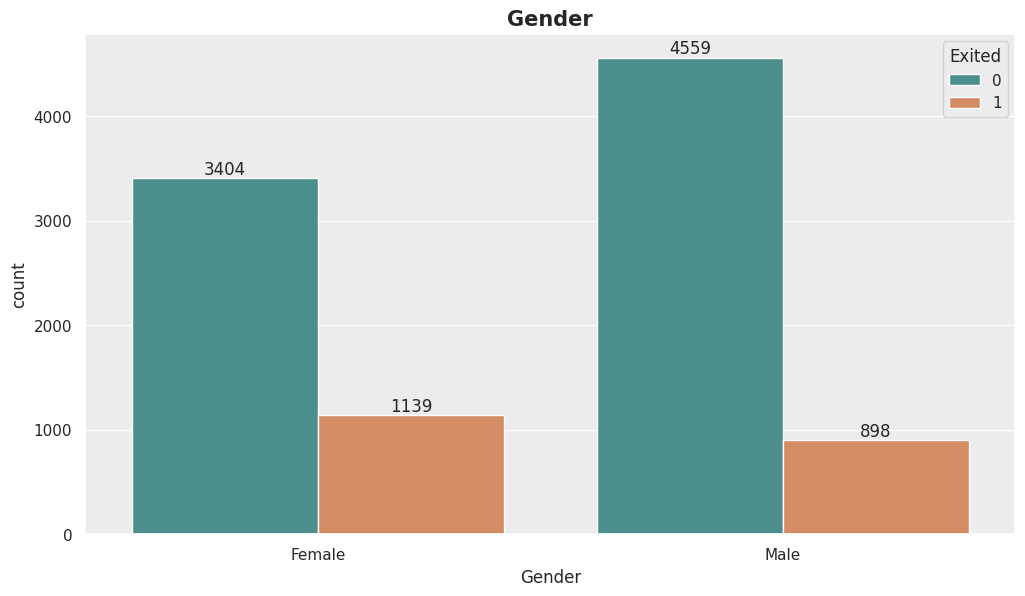

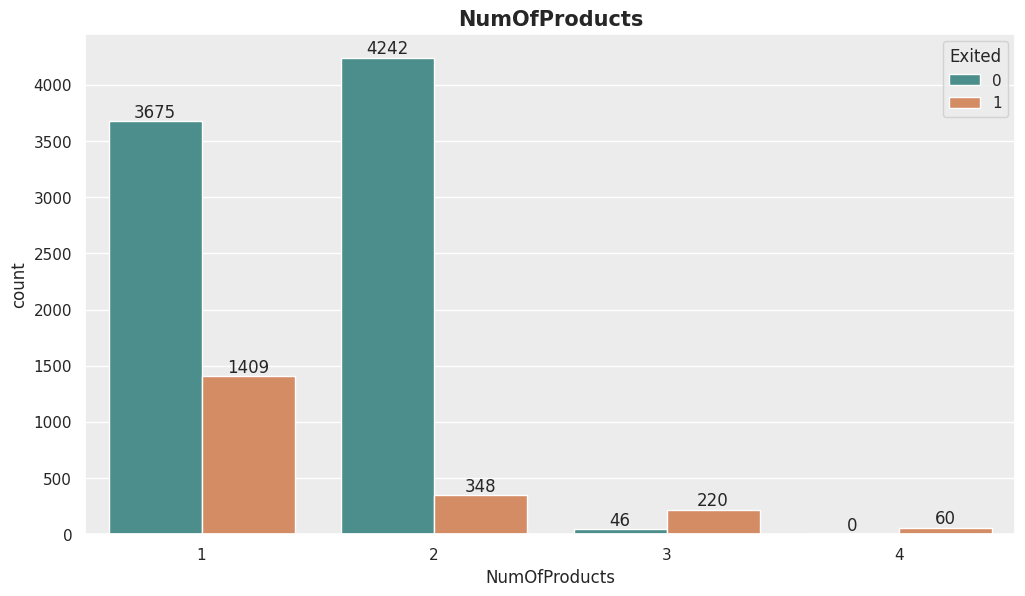

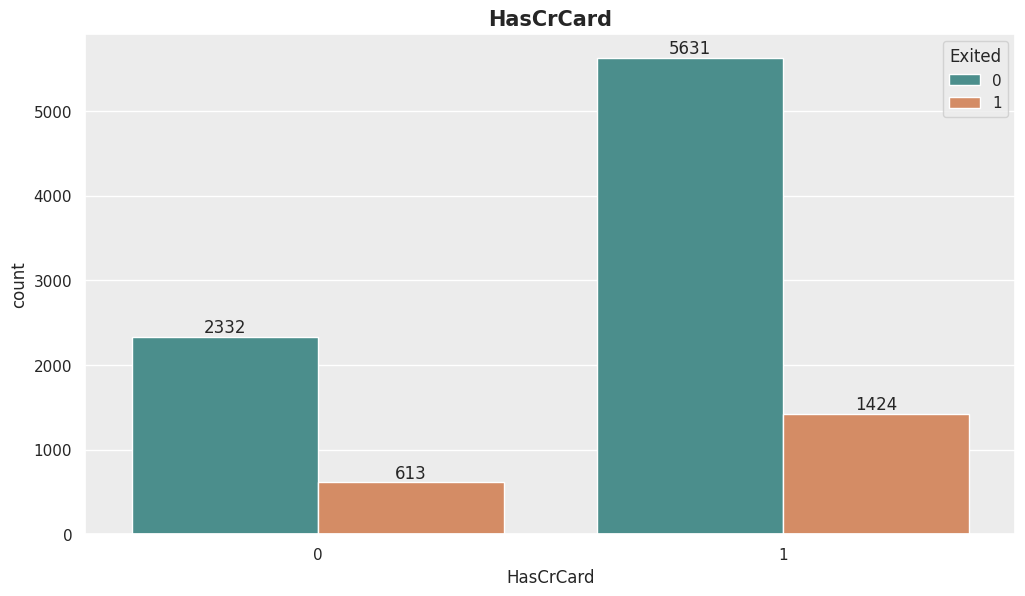

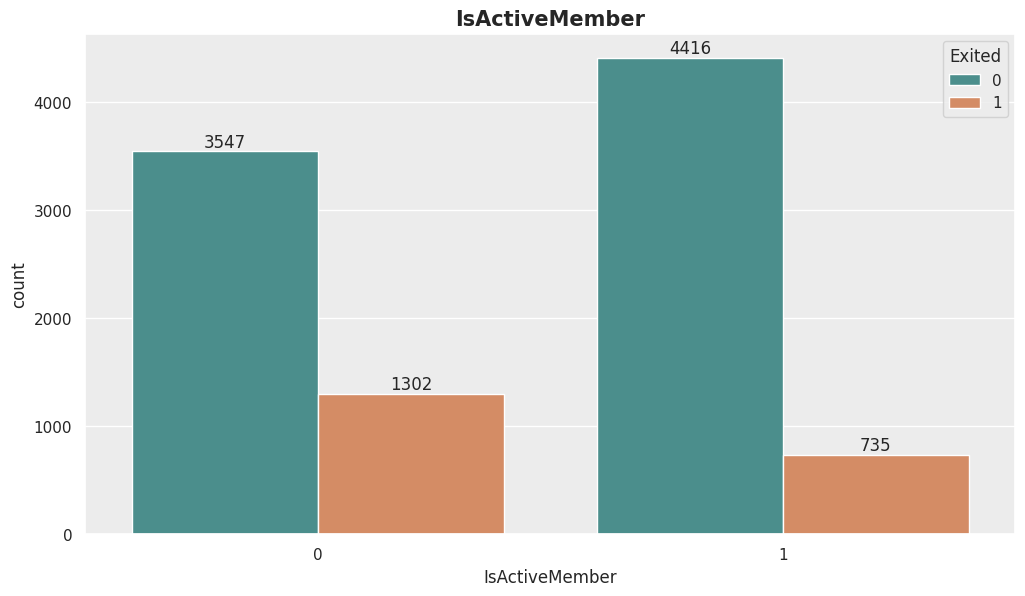

Text(0.5, 1.0, 'Churn por idade')

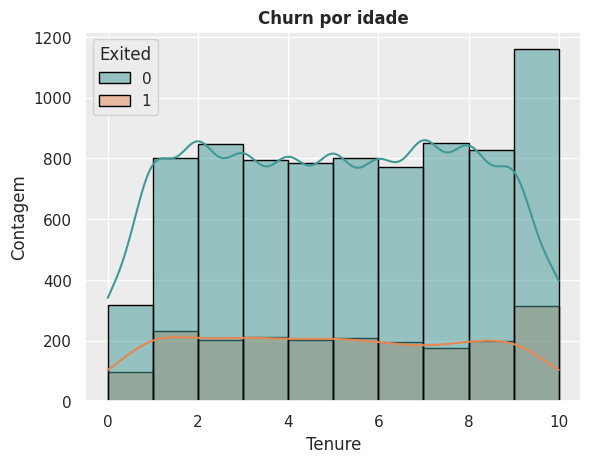

In [6]:
list_of_cat_features = df[['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]
palette_features = [ "#409996", '#E68753']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5))
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.countplot(data = df, x = df[feature], hue = 'Exited', palette=palette_features)
    #Adicionar rotulos as colunas
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

#plotando um hiatograma
sns.histplot(data= df, x= "Tenure", hue= "Exited", bins=10, kde=True,edgecolor='black', palette=palette_features)

plt.xlabel('Tenure')
plt.ylabel('Contagem')
plt.title("Churn por idade", fontweight='bold' )

Ao observar os gráficos, é possivel destacar algumas coisas:

A maioria dos clientes estão na França, mas a Alemanha foi a região onde mais clientes foram perdidos.

As mulheres foram as que mais deixaram de ser clientes.

O tempo em que uma pessoa é cliente (Tenure), não é algo que nos ajuda a entender muito o motivo das pessoas deixarem o banco.

O número de produtos é um forte indicativo de um dos motivos das pessoas deixaram o banco, talvez isso seja um indicador de que nem todos os serviços do banco agradam aos clientes.

O cartão de crédito pode ser outro problema, mas ainda é necessário enteder melhor esses dados.

E pessoas que não são clientes ativos, acabam deixando o banco com mais frequência.

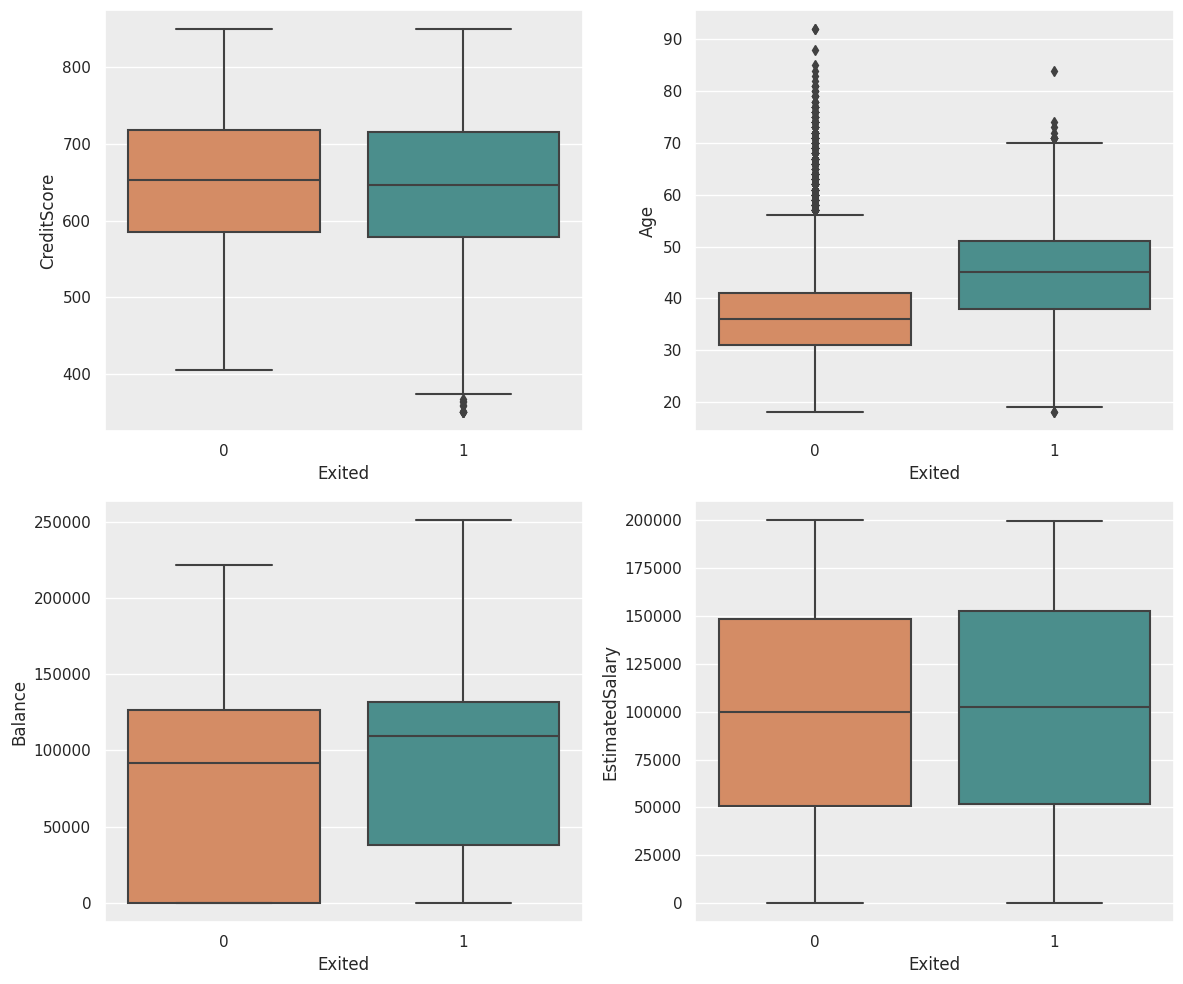

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, palette=palette_features, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, palette=palette_features, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, palette=palette_features, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, palette=palette_features, ax = ax[1][1])

plt.tight_layout()
plt.show()

Agora conseguirmos ter outras visões dos dados, e conseguinos fazer as seguintes afirmações:

A maior parte das pessoas que deixaram de ser clientes, são pessoas mais velhas.

E muitos dos clientes que o banco perdeu, era de pessoas com bastante poder aquisitivo.

Então agora é necessário tesponder as seguintes perguntas:

1-  Por que pessoas mais velhas tem mais tendência a deixar os banco?


2- O cartão de crédito é realmente um dos motivos para as pessoas deixarem o banco?

Resolvendo a questão da idade.

Primeiro criando um histograma para visualizar como os dados estão distribuídos.

Text(0.5, 1.0, 'Churn por idade')

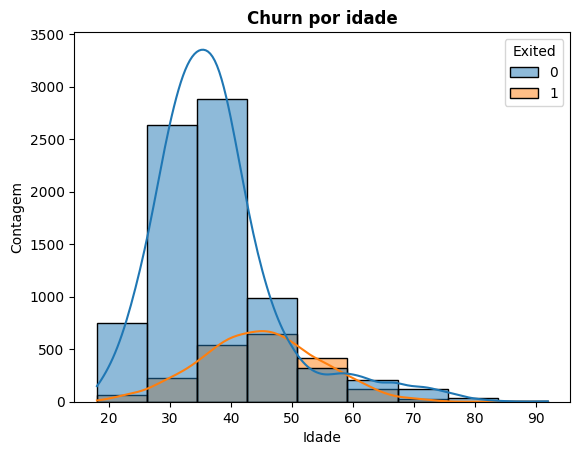

In [ ]:
sns.histplot(data= df, x= "Age", hue= "Exited", bins=9, kde=True,edgecolor='black', )

plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title("Churn por idade", fontweight='bold' )

Agora vou classificar a idade em grupos 5 menores

In [7]:
#Criando a função que vai dar número aos grupos

def idade_group(idade):
    if idade <=35:
        return 1
    elif idade > 35 and idade <= 45:
        return 2
    elif idade > 45 and idade <= 55:
        return 3
    elif idade > 55 and idade <= 65:
        return 4
    else:
        return 5

#adicionando essa divisão de grupos no dataframe
df["Group"] = df["Age"].map(idade_group)

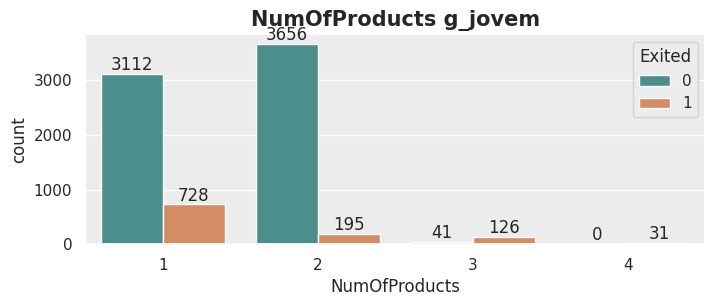

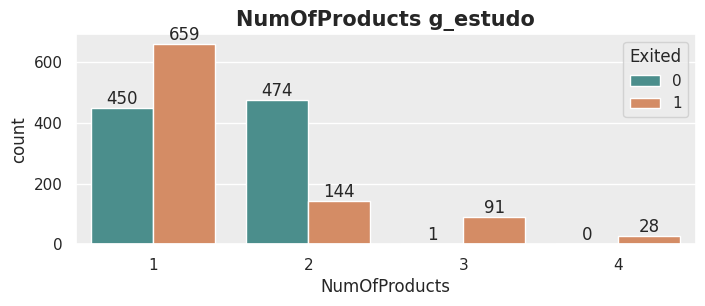

In [10]:
#separando os grupos 3 e 4(45 a 65 anos)
g_estudo = df.loc[df["Group"].isin([3,4])]

#separando os grupos 1 e 2(18 a 45)
g_jovem = df.loc[df["Group"].isin([1,2])]

#analisando os dados sobre a quantidade de produtos

#plotando os dados com clientes mais jovens
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("NumOfProducts g_jovem", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x = g_jovem["NumOfProducts"], hue = g_jovem['Exited'], palette=palette_features)
#Adicionar rotulos as colunas
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#plotando os dados com os clientes mais velhos
plt.figure(figsize=(8,6))
plt.subplot(2,1,2)
plt.title("NumOfProducts g_estudo", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x = g_estudo["NumOfProducts"], hue = g_estudo['Exited'], palette=palette_features)
#Adicionar rotulos as colunas
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Após analisar esses dois dados tantos dos clientes mais jovens como os dos mais velhos, é bem  evidente que um dos motivos de os clientes deixarem o banco são os produtos oferecidos.
Porque quanto mais produtos o cliente adquire é mais provavel que ele deixe o banco. E podemos afirmar que pelo menos dois produtos que o banco oferece são insatisfatorios, tanto para os mais jovens quanto para os clientes de mais idade. E apenas 1 produto agrada os clientes de mais idade.

Vamos continuar a observar mais os dados pra tentar conseguir mais respostas para o motivo da saída de clientes de mais idade.

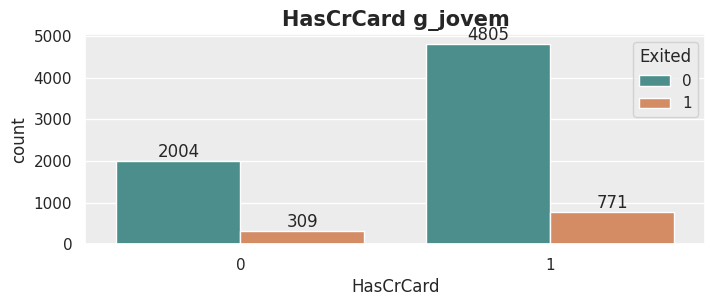

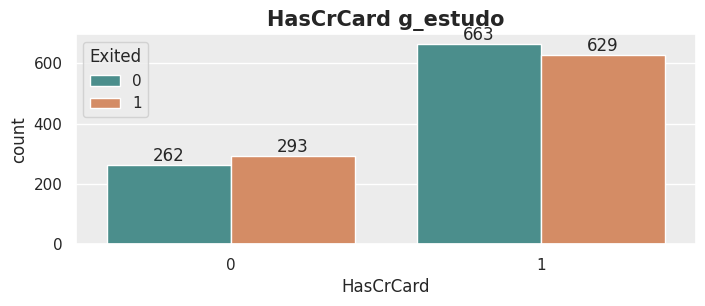

In [11]:
#Analisando os dados sobre o cartão de credito

#plotando os dados com clientes mais jovens
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("HasCrCard g_jovem", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x = g_jovem["HasCrCard"], hue = g_jovem['Exited'], palette=palette_features)
#Adicionar rotulos as colunas
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#plotando os dados com os clientes mais velhos
plt.figure(figsize=(8,6))
plt.subplot(2,1,2)
plt.title("HasCrCard g_estudo", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x = g_estudo["HasCrCard"], hue = g_estudo['Exited'], palette=palette_features)
#Adicionar rotulos as colunas
for container in ax.containers:
    ax.bar_label(container)
plt.show()

O que antes poderia ser considerado um problema que era o cartão de crédito, agora nos ajuda a perceber que não, pois a maioria dos clientes mais jovens que tem cartão de crédito continuam sendo clientes.

Então isso mostra que o banco não tem serviços tão interessantes para pessoas com mais idade, e o cartão de crédito não é algo que por si só   não tem a capacidade de fidelizar os clientes.

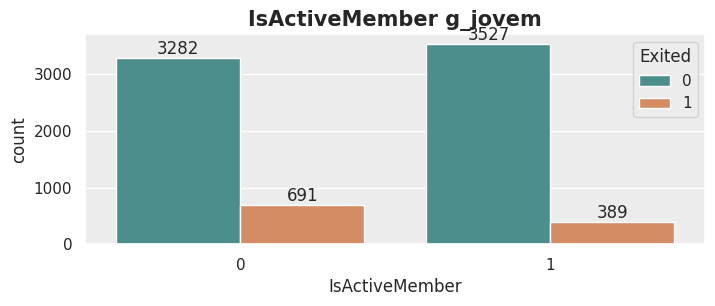

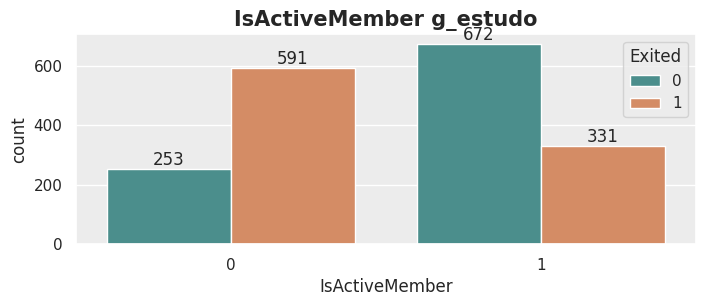

In [12]:
#Analisando os dados sobre os clientes ativos ou não.

#plotando os dados com clientes mais jovens
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("IsActiveMember g_jovem", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x = g_jovem["IsActiveMember"], hue = g_jovem['Exited'], palette=palette_features)
#Adicionar rotulos as colunas
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#plotando os dados com os clientes mais velhos
plt.figure(figsize=(8,6))
plt.subplot(2,1,2)
plt.title("IsActiveMember g_estudo", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x = g_estudo["IsActiveMember"], hue = g_estudo['Exited'], palette=palette_features)
#Adicionar rotulos as colunas
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Mais uma vez ficou evidente que o problema é que os produtos q o banco oferece, ou o modelo de negócio não é algo que agrada tanto as pessoas de mais idade, porque mesmo quando alguem que está no grupo dos mais jovens não é um cliente ativo, ainda assim ele permanece sendo um cliente do banco.

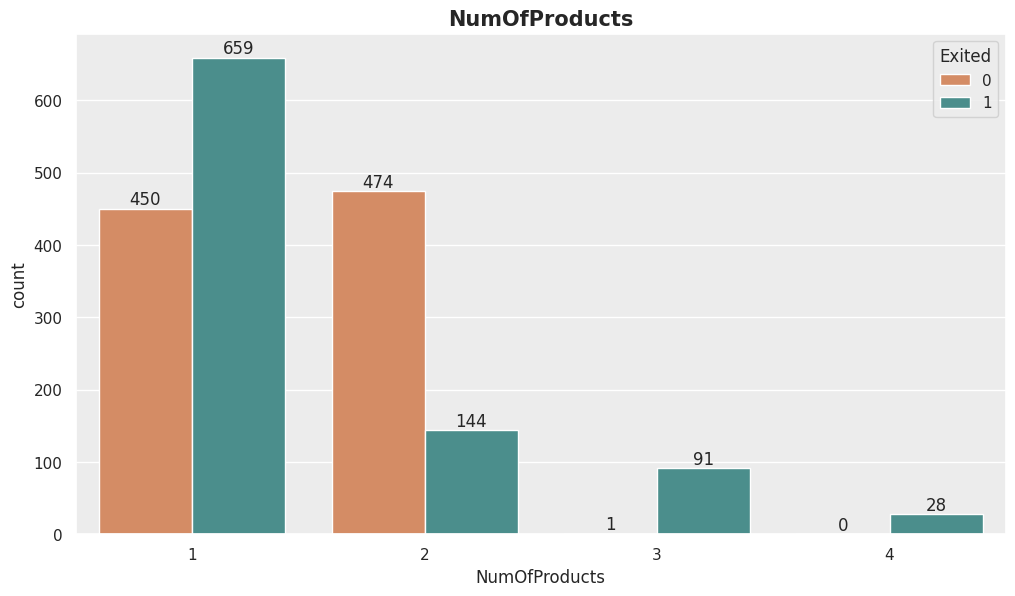

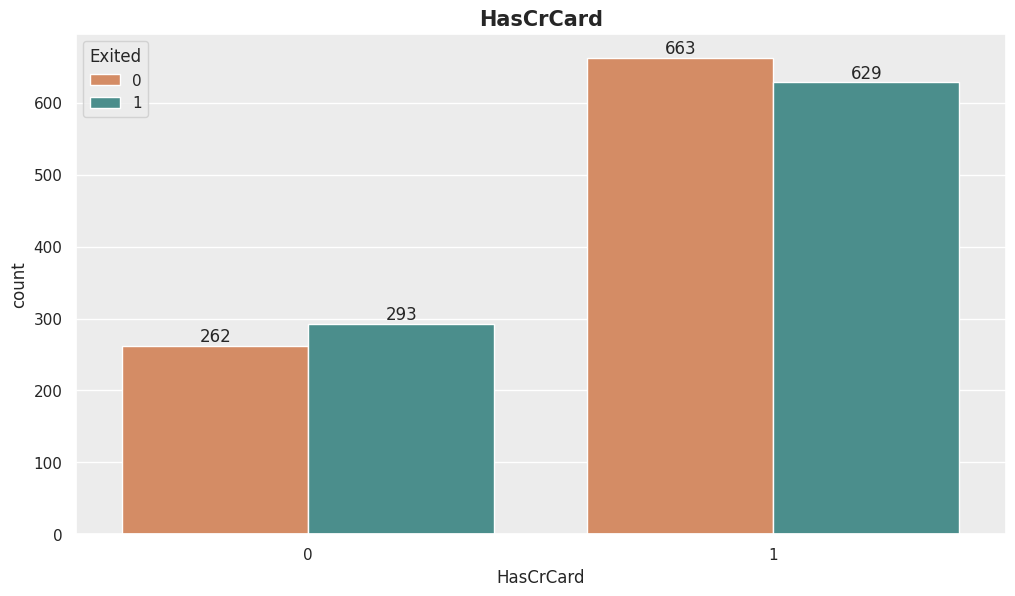

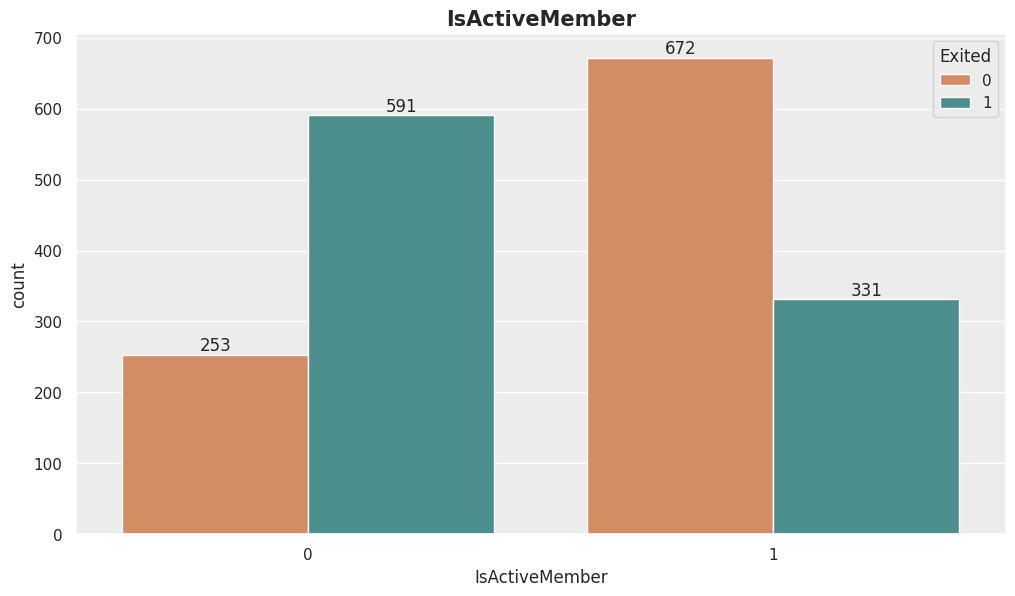

In [ ]:
#separando os grupos 3 e 4(45 a 65 anos)
g_estudo = df.loc[df["Group"].isin([3,4])]



list_of_cat_features = df[['NumOfProducts', 'HasCrCard', 'IsActiveMember']]
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5))
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.countplot(data = g_estudo, x = g_estudo[feature], hue = 'Exited', palette=palette_features)
    #Adicionar rotulos as colunas
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

Text(0.5, 1.0, 'Churn por idade')

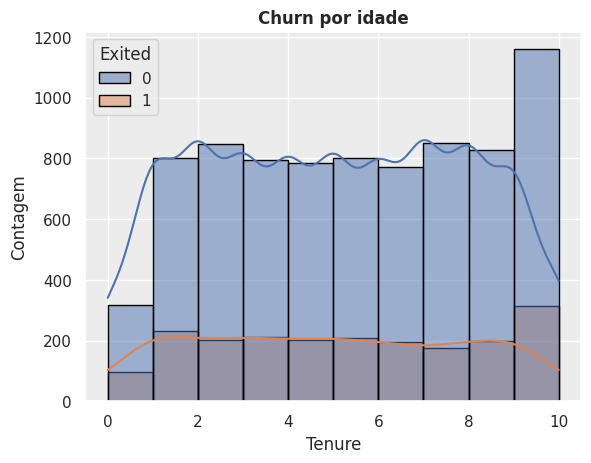

In [ ]:
sns.histplot(data= df, x= "Tenure", hue= "Exited", bins=10, kde=True,edgecolor='black', )

plt.xlabel('Tenure')
plt.ylabel('Contagem')
plt.title("Churn por idade", fontweight='bold' )

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Exited', ylabel='Balance'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


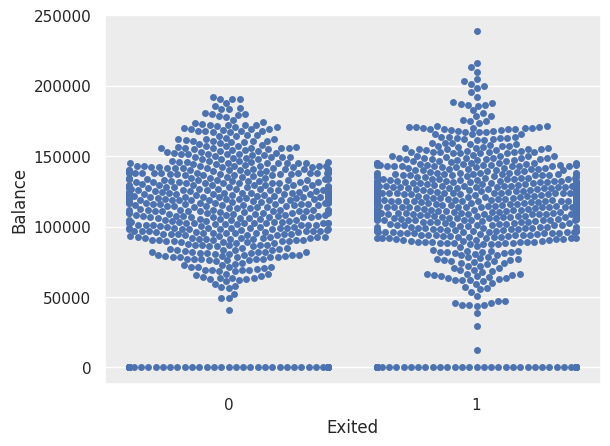

In [ ]:
sns.swarmplot(x="Exited", data = g_estudo, y= "Balance")

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

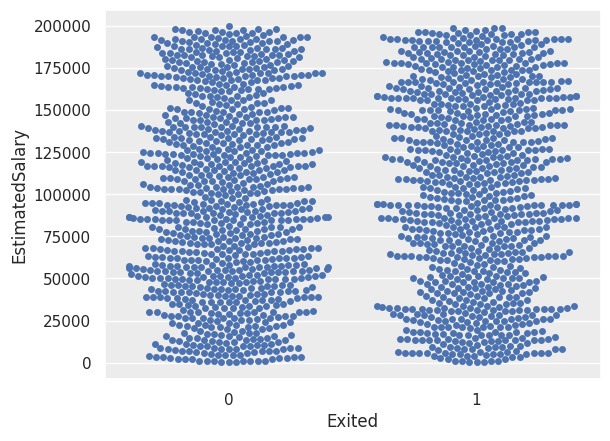

In [ ]:
sns.swarmplot(x="Exited", data = g_estudo, y= "EstimatedSalary")

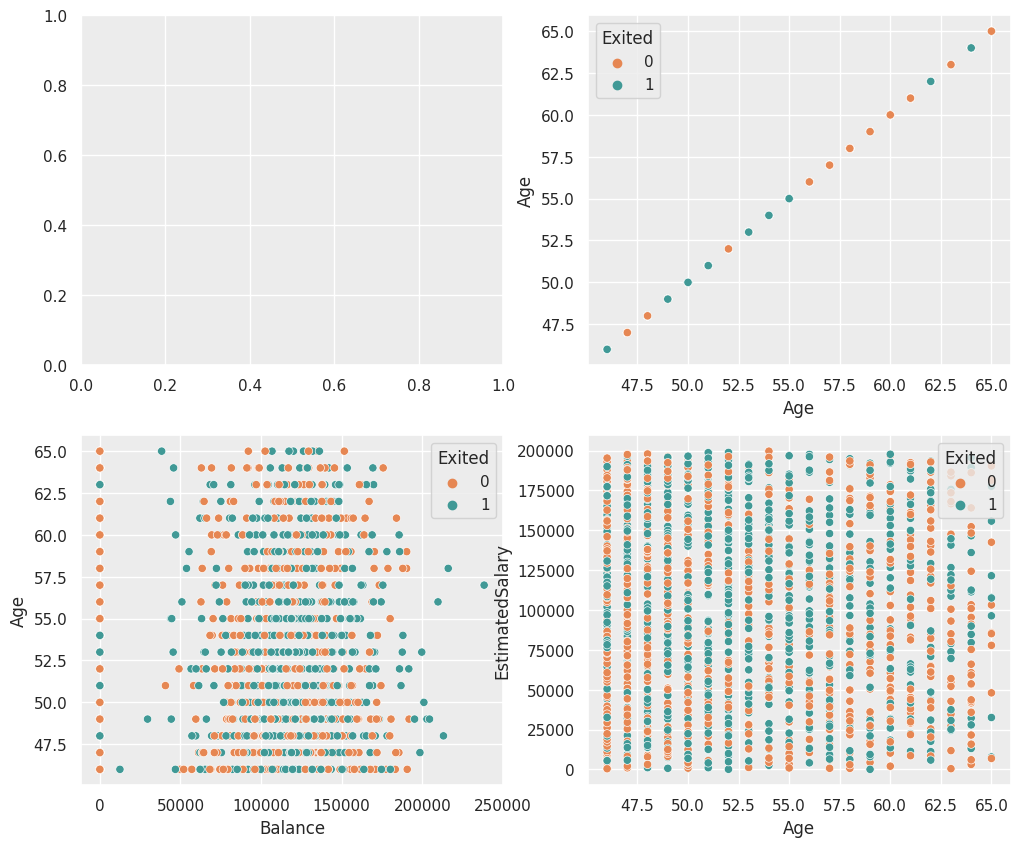

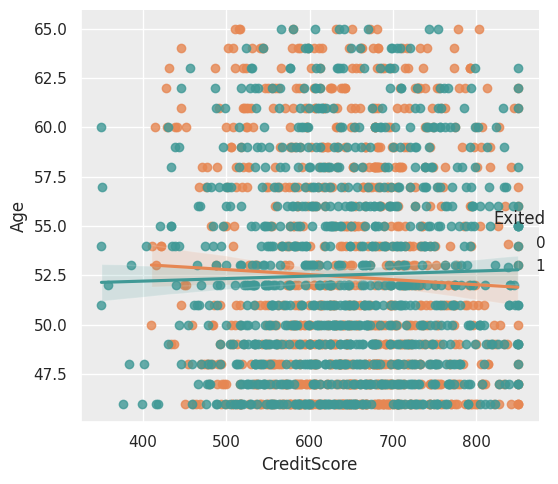

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))

sns.lmplot(x = 'CreditScore', hue ="Exited", y = 'Age', data = g_estudo, palette=palette_features)
sns.scatterplot(x = 'Age', hue ="Exited", y = 'Age', data = g_estudo, palette=palette_features, ax = ax[0][1])
sns.scatterplot(x = 'Balance', hue ="Exited", y = 'Age', data = g_estudo, palette=palette_features, ax = ax[1][0])
sns.scatterplot(x = 'Age', hue ="Exited", y = 'EstimatedSalary', data = g_estudo, palette=palette_features, ax = ax[1][1])

plt.tight_layout()
plt.show()

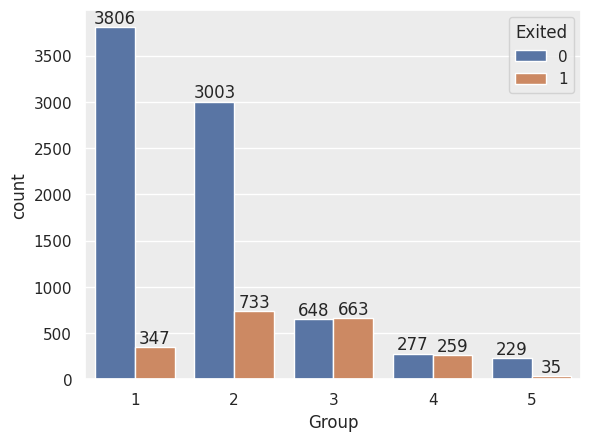

In [ ]:
ax = sns.countplot(x= df["Group"], hue=df["Exited"])

for container in ax.containers:
    ax.bar_label(container)

plt.show()

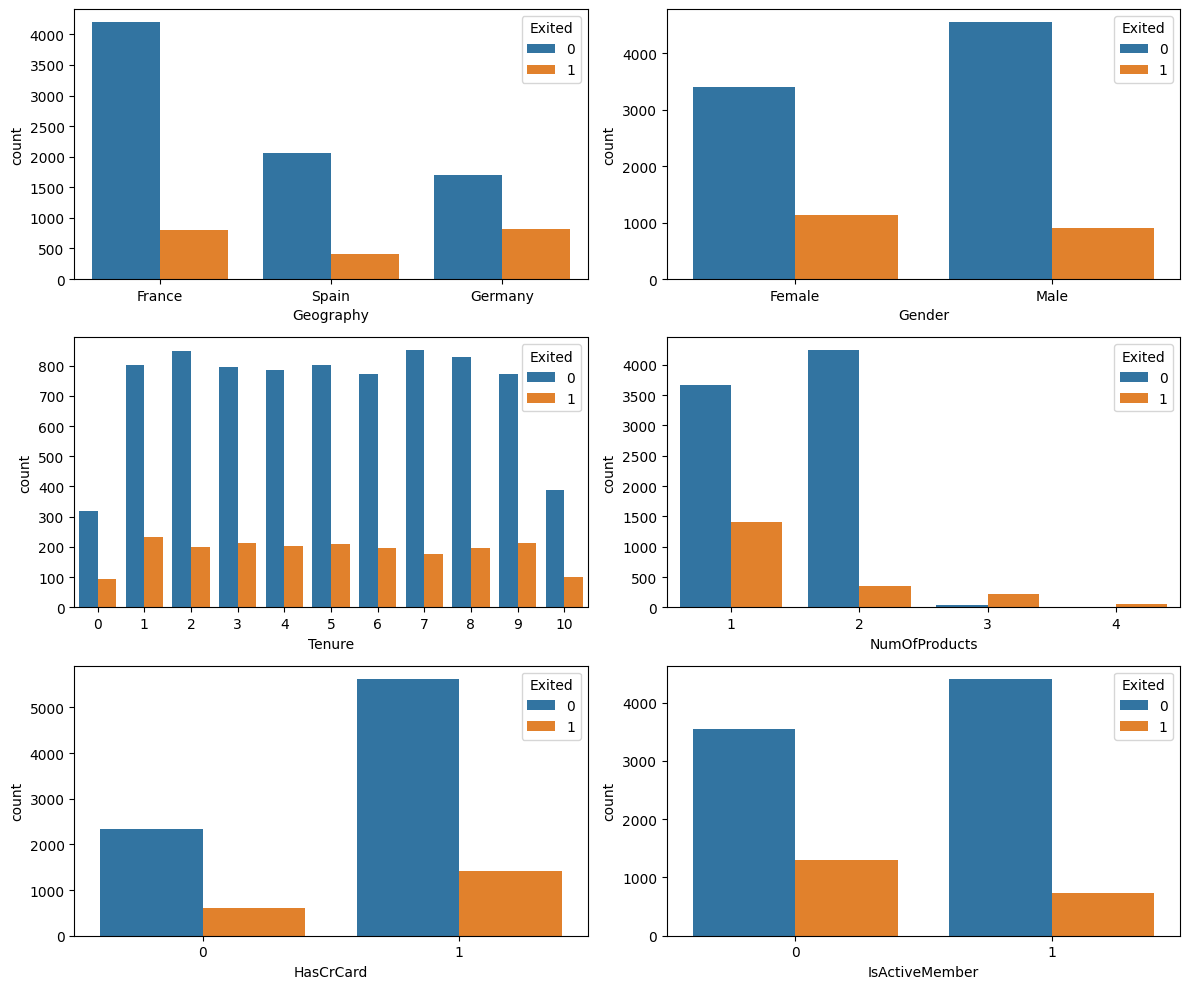

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (12, 10))

sns.countplot(x='Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot(x='Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot(x='NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

In [ ]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


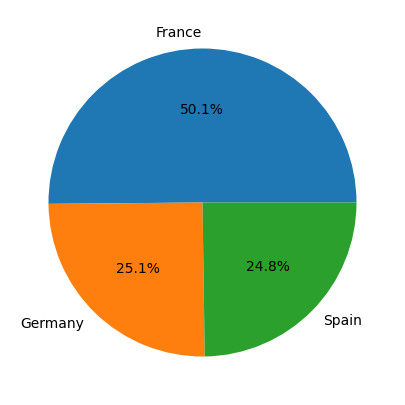

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))


plt.pie(df.Geography.value_counts(), labels=['France', 'Germany', "Spain"], autopct='%1.1f%%')
plt.show()

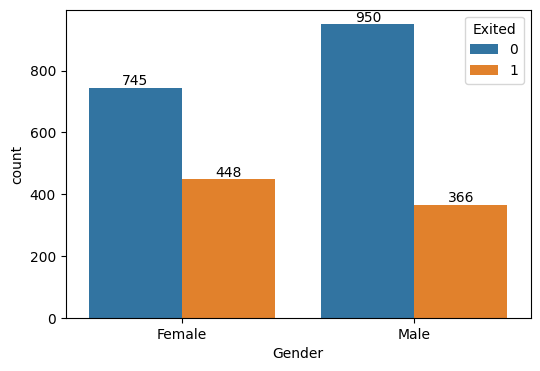

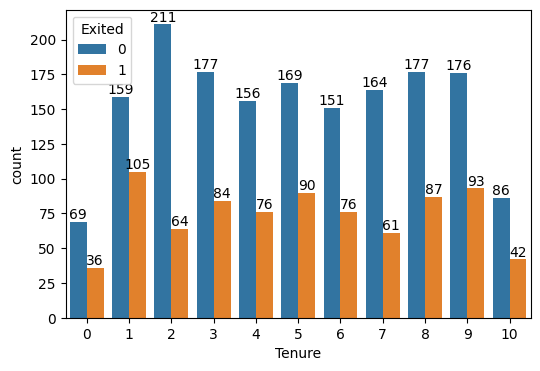

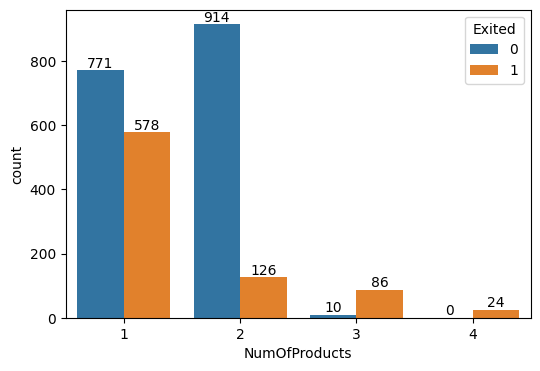

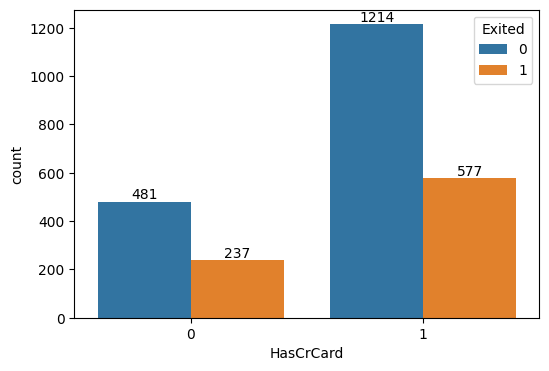

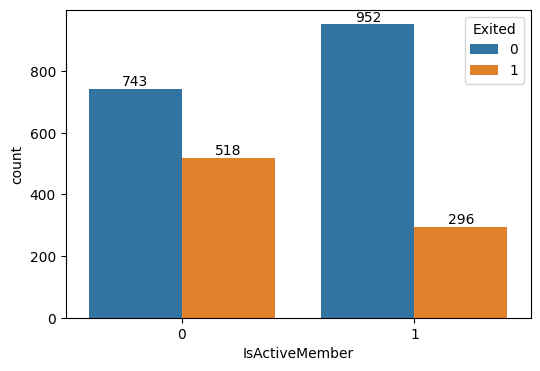

In [ ]:
#Alemanha
ger = df.loc[df["Geography"] == "Germany"]

feat = ["Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]

for i in feat:
    plt.figure(figsize=(6,4))
    f = sns.countplot(data = ger, x=i, hue="Exited")
    for container in f.containers:
        f.bar_label(container)
    plt.show()

Um analise mais profunda por países

In [ ]:
ger.groupby(["HasCrCard","NumOfProducts"]).Exited

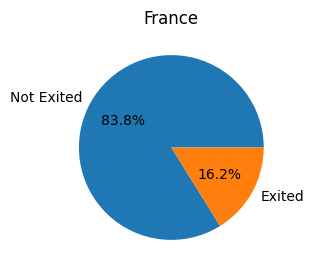

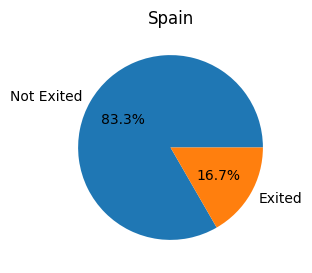

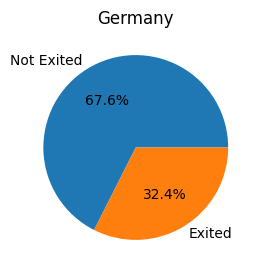

In [ ]:
ger = df.loc[df['Geography'] == 'Germany' ]

#plt.pie(ger.Exited.value_counts(), labels=['Not Exited', 'Exited'], autopct='%1.1f%%')
#plt.show()
#value = ex.Geography.value_counts()
#labels=['France', 'Germany', "Spain"]
#plt.pie(value, labels=['France', 'Germany', "Spain"], autopct='%1.1f%%')
#plt.show()

pais = list(df['Geography'].unique())

for i in pais:
  count = df.loc[df['Geography'] == i ]
  fig, ax = plt.subplots(figsize = (4, 3),dpi = 100)
  plt.pie(count.Exited.value_counts(), labels=['Not Exited', 'Exited'], autopct='%1.1f%%')
  plt.title(i)
  plt.show()
  print("\n")